In [1]:
import pandas as pd
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
from urllib import parse
from collections import Counter
warnings.filterwarnings("ignore")
plt.rc('font', family='Malgun Gothic')
%matplotlib inline

In [2]:
#10월 07일 ~ 10월 08일

In [14]:
wordCnt = pd.read_csv('fianl1008.csv') 

In [15]:
wordCnt

,url,검색어
0,h-lecture/,2022
1,h-vod/,2021수능
2,cmp/main-relate/,2016 수능 윤리와 사상
3,cmp/main-relate/,2021수능
4,p-course/,6학년 수학
...,...,...
290071,h-dyuna/,이몸이죽어가서
290072,h-resource/,이몸이죽어가서
290073,h-share/,이몸이죽어가서
290074,h-community/,이몸이죽어가서


In [5]:
#붙어있는 데이터 삭제 (붙어 있는 데이터는 검색1회로 처리하기 위해)

words = [wordCnt["검색어"][0]]

for i in range(1,len(wordCnt)):
    if words[-1] == wordCnt["검색어"][i]:
        continue
    else:
        words.append(wordCnt["검색어"][i])

In [6]:
#10월 08일 ~ 10월 09일 검색 빈도수 순위

cnt = Counter(words)
result = dict(cnt)
rank = sorted(result.items(),reverse=True,key=lambda item: item[1])
for i in range(100): #100위 까지만 확인
    print(i+1,"위: ",rank[i])

1 위:  ('추천검색어', 1175)
2 위:  ('수능특강', 1079)
3 위:  ('수학', 958)
4 위:  ('한국사', 836)
5 위:  ('ㅇ', 825)
6 위:  ('영어', 784)
7 위:  ('왕초보영어', 751)
8 위:  ('과학', 704)
9 위:  ('뉴런', 659)
10 위:  ('수능완성', 639)
11 위:  ('6회 철인 삼종 그래프', 639)
12 위:  ('4회 수건빙고', 613)
13 위:  ('국어', 591)
14 위:  ('정승제', 581)
15 위:  ('ㅅ', 554)
16 위:  ('ㄱ', 544)
17 위:  ('ㅈ', 507)
18 위:  ('중', 456)
19 위:  ('모의고사', 445)
20 위:  ('생명과학', 445)
21 위:  ('역사', 439)
22 위:  ('올림포스', 427)
23 위:  ('만점왕', 421)
24 위:  ('주', 405)
25 위:  ('세계사', 370)
26 위:  ('중학', 368)
27 위:  ('여', 363)
28 위:  ('화학', 351)
29 위:  ('독서', 350)
30 위:  ('너에게 가장 듣고 싶은 말', 315)
31 위:  ('통합사회', 313)
32 위:  ('뉴', 313)
33 위:  ('카타미노(중급)', 312)
34 위:  ('수', 309)
35 위:  ('6회 펜토미노가 심쿵해', 306)
36 위:  ('통합과학', 298)
37 위:  ('메시지를 확인하라', 298)
38 위:  ('펜토미노(초급)', 294)
39 위:  ('ebs', 289)
40 위:  ('건축예술로서의 보도블록', 288)
41 위:  ('ㅁ', 286)
42 위:  ('정승익', 280)
43 위:  ('영어듣기', 279)
44 위:  ('아름다운 디자인, 테셀레이션', 274)
45 위:  ('14회 접시로 나눗셈', 272)
46 위:  ('사회', 267)
47 위:  ('스마트폰 대신에 깨끗한 물!', 

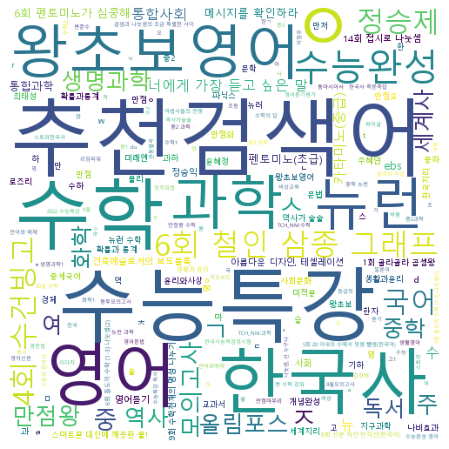

In [7]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white', width=500, height=500).generate_from_frequencies(result)

plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

In [8]:
#50위권내 오타나는 단어 찾아보기 (오타 : ㅇ, ㄱ, ㅈ, ㅅ, ㅁ, ㄴ )

typo = wordCnt.index[(wordCnt['검색어'] == 'ㅇ') | 
                     (wordCnt['검색어'] == 'ㅅ') |
                     (wordCnt['검색어'] == 'ㄱ') |
                     (wordCnt['검색어'] == 'ㅈ') |
                     (wordCnt['검색어'] == 'ㅁ') |
                     (wordCnt['검색어'] == 'd' )].tolist() #인덱스 뽑기

for i in range(len(typo)): #일반적으로 오타뒤에 원래 원하는 값(인덱스 +1)을 입력할 확률이 높으므로 뒤에 검색한 내용을 찾기
    typo[i] = typo[i]+1

In [9]:
typoKeyword = wordCnt.loc[typo]["검색어"]

typoKeyword = Counter(typoKeyword)
result = dict(typoKeyword)
rank = sorted(result.items(),reverse=True,key=lambda item: item[1])
for i in range(50): #50위 까지만 확인
    print(i+1,"위: ",rank[i])

1 위:  ('주', 70)
2 위:  ('여', 60)
3 위:  ('ㅇ', 60)
4 위:  ('수', 47)
5 위:  ('고', 43)
6 위:  ('중', 32)
7 위:  ('이', 31)
8 위:  ('추천검색어', 30)
9 위:  ('마', 30)
10 위:  ('스', 28)
11 위:  ('ㅁ', 24)
12 위:  ('구', 23)
13 위:  ('기', 22)
14 위:  ('ㅅ', 22)
15 위:  ('ㅎ', 20)
16 위:  ('ㅈ', 19)
17 위:  ('어', 19)
18 위:  ('미', 19)
19 위:  ('영', 18)
20 위:  ('오', 18)
21 위:  ('국어', 17)
22 위:  ('ㅇㆍ', 17)
23 위:  ('ㄱ', 17)
24 위:  ('한국사', 17)
25 위:  ('과', 16)
26 위:  ('수능특강', 16)
27 위:  ('그', 16)
28 위:  ('만', 15)
29 위:  ('du', 14)
30 위:  ('저', 13)
31 위:  ('즈', 12)
32 위:  ('수학', 12)
33 위:  ('ㄱㆍ', 12)
34 위:  ('d', 12)
35 위:  ('국', 11)
36 위:  ('사', 11)
37 위:  ('ㅊ', 11)
38 위:  ('수능완성', 10)
39 위:  ('스마트폰 대신에 깨끗한 물!', 9)
40 위:  ('세', 9)
41 위:  ('생명과학', 9)
42 위:  ('왕초보영어', 9)
43 위:  ('뉴런', 9)
44 위:  ('6회 펜토미노가 심쿵해', 9)
45 위:  ('정', 9)
46 위:  ('모의고사', 8)
47 위:  ('4회 수건빙고', 8)
48 위:  ('과학', 8)
49 위:  ('6회 철인 삼종 그래프', 8)
50 위:  ('시', 8)


In [10]:
#50위권내 오타나는 단어 찾아보기 (오타 : ㅇ, ㄱ, ㅈ, ㅅ, ㅁ, ㄴ )

typo = wordCnt.index[(wordCnt['검색어'] == 'ㅇ') | 
                     (wordCnt['검색어'] == 'ㅅ') |
                     (wordCnt['검색어'] == 'ㄱ') |
                     (wordCnt['검색어'] == 'ㅈ') |
                     (wordCnt['검색어'] == 'ㅁ') |
                     (wordCnt['검색어'] == 'd' )].tolist() #인덱스 뽑기

for i in range(len(typo)): #일반적으로 오타뒤에 원래 원하는 값(인덱스 +1)을 입력할 확률이 높으므로 뒤에 검색한 내용을 찾기
    typo[i] = typo[i]+2

In [11]:
typoKeyword = wordCnt.loc[typo]["검색어"]

typoKeyword = Counter(typoKeyword)
result = dict(typoKeyword)
rank = sorted(result.items(),reverse=True,key=lambda item: item[1])
for i in range(50): #50위 까지만 확인
    print(i+1,"위: ",rank[i])

1 위:  ('ㅇ', 55)
2 위:  ('주', 36)
3 위:  ('여', 31)
4 위:  ('중', 28)
5 위:  ('수', 24)
6 위:  ('마', 24)
7 위:  ('고', 22)
8 위:  ('한국사', 22)
9 위:  ('ㅁ', 21)
10 위:  ('영', 19)
11 위:  ('미', 18)
12 위:  ('이', 17)
13 위:  ('만', 17)
14 위:  ('ㅅ', 17)
15 위:  ('수학', 16)
16 위:  ('숳', 16)
17 위:  ('ㄱ', 16)
18 위:  ('국', 15)
19 위:  ('어', 15)
20 위:  ('구', 14)
21 위:  ('과', 13)
22 위:  ('ㅎ', 13)
23 위:  ('스', 13)
24 위:  ('영ㅇ', 12)
25 위:  ('만점왕', 12)
26 위:  ('d', 12)
27 위:  ('모의고사', 11)
28 위:  ('역', 11)
29 위:  ('추천검색어', 11)
30 위:  ('ㅇㆍ', 11)
31 위:  ('6회 철인 삼종 그래프', 11)
32 위:  ('수능완성', 11)
33 위:  ('과학', 10)
34 위:  ('그', 10)
35 위:  ('ㅈ', 10)
36 위:  ('수하', 10)
37 위:  ('수능특강', 10)
38 위:  ('괗', 9)
39 위:  ('영어', 9)
40 위:  ('ㅊ', 9)
41 위:  ('저', 9)
42 위:  ('뉴런', 9)
43 위:  ('국어', 8)
44 위:  ('중ㅎ', 8)
45 위:  ('지', 8)
46 위:  ('생명과학', 8)
47 위:  ('너에게 가장 듣고 싶은 말', 8)
48 위:  ('4회 수건빙고', 8)
49 위:  ('통합과학', 8)
50 위:  ('기', 7)


In [13]:
#"ㅇ만 확인"

typo = wordCnt.index[wordCnt['검색어'] == 'ㅇ'].tolist() #인덱스 뽑기
typo1 = []
typo2 = []
for i in range(len(typo)): #일반적으로 오타뒤에 원래 원하는 값(인덱스 +1)을 입력할 확률이 높으므로 뒤에 검색한 내용을 찾기
    typo1.append(typo[i]+1)
    typo2.append(typo[i]+2)
    
typoKeyword = wordCnt.loc[typo]
typo1 = wordCnt.loc[typo1]["검색어"]
typo2 = wordCnt.loc[typo2]["검색어"]

typoKeyword = typoKeyword.reset_index(drop = True)
typo1 = typo1.reset_index(drop = True)
typo2 = typo2.reset_index(drop = True)

typoKeyword["+1"] = typo1
typoKeyword["+2"] = typo2

typoKeyword = typoKeyword[["검색어","+1","+2"]]
typoKeyword[1:30]

,검색어,+1,+2
1,ㅇ,추천검색어,통합사회
2,ㅇ,영어변형,영어변형
3,ㅇ,역사가 술술,중1ㄱ
4,ㅇ,김동욱,식묽
5,ㅇ,이,괗
6,ㅇ,올림포스,중3 뉸ᆢ
7,ㅇ,윤리와 사상 수능특강,검정고시
8,ㅇ,모의고사,이
9,ㅇ,언어의역사성,수능특강수학2
10,ㅇ,모의고사,모의고사


In [115]:
#방송관련 url 찾기용
'''
75번째 'main-play-char-kid/'
73번째 'main-play-program/'
67번째 'main-play-vod-kid/'
66번째 'main-play-vod/'
'''
for i in range(len(wordCnt["url"].value_counts().keys())):
    rank5 = wordCnt[wordCnt["url"] == f"{wordCnt['url'].value_counts().keys()[i]}"]
    print(f"{i}번째",rank5.value_counts()[:10])

0번째 url           검색어
cmp/ark-mid/  뉴런     505
              중      455
              ㅈ      400
              주      390
              중학     324
              뉴      316
              ㄱ      303
              ㅇ      299
              뉴러     259
              ㅅ      243
dtype: int64
1번째 url           검색어
cmp/ark-pms/  ㅇ      411
              만점왕    334
              ㅅ      244
              만      216
              만점     197
              ㅁ      193
              여      193
              ㄱ      172
              마      171
              만저     169
dtype: int64
2번째 url               검색어  
cmp/main-relate/  추천검색어    1271
                  수능특강      435
                  수학        254
                  수능완성      254
                  한국사       247
                  영어        184
                  왕초보영어     174
                  정승제       165
                  국어        164
                  올림포스      155
dtype: int64
3번째 url      검색어 
h-ibsi/  정승제     92
         수능특강    90
         모의

In [105]:
#방송관련 키워드 20위까지 확인 

'''
'main-play-char-kid/'
'main-play-program/'
'main-play-vod-kid/'
'main-play-vod/'
'''
vod1 = wordCnt[wordCnt["url"] == "main-play-char-kid/"]
vod1 = vod1.reset_index(drop = True)

vod2 = wordCnt[wordCnt["url"] == "main-play-program/"]
vod2 = vod2.reset_index(drop = True)

vod3 = wordCnt[wordCnt["url"] == "main-play-vod-kid/"]
vod3 = vod3.reset_index(drop = True)

vod4 = wordCnt[wordCnt["url"] == "main-play-vod/"]
vod4 = vod4.reset_index(drop = True)

In [114]:
pd.concat([vod1,vod2,vod3,vod4])['검색어'].reset_index(drop = True)

0          여행
1          유아
2         부동산
3        한글용사
4          돈의
        ...  
743      톡톡코딩
744      톡톡코딩
745       초대석
746       파닉스
747    위대한수업 
Name: 검색어, Length: 748, dtype: object